###### <center>**A Thesis Project Implementation By Jonaz Juan C. Sayson & Fabiola C. Villanueva**</center> 

# <center>**Data Preprocessing**</center>
---

This file prepares the dataset for usage by removing null values and duplicates, reformatting its dates into years, and removing its outliers via Inter Quartile Range method.

In [51]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **2.1 Importing and Viewing the Raw Dataset**

Importing the raw dataset as '**spotifyDF**' using the copied file which shall be ready to use for preprocessing and displaying the first and last five rows of the data frame.

In [52]:
# Import and set max columns of spotify data frame
spotifyDF = pd.read_csv('Datasets/01_high_popularity_spotify_data(modifiedCopy).csv')
pd.set_option('display.max_columns', None)

# Display rows and columns count
print(f"{spotifyDF.shape[0]} rows x {spotifyDF.shape[1]} columns\n\nFirst and last 5 rows of the dataset:")

display(spotifyDF.head())
display(spotifyDF.tail())

1686 rows x 29 columns

First and last 5 rows of the dataset:


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,76,https://api.spotify.com/v1/tracks/26b3oVLrRUaa...,spotify:track:26b3oVLrRUaaybJulow9kz,People,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/26b3...,26b3oVLrRUaaybJulow9kz,People,2022-12-06,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.551,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,74,https://api.spotify.com/v1/tracks/1wADwLSkYhrS...,spotify:track:1wADwLSkYhrSmy4vdy6BRn,Boy Alone,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/1wAD...,1wADwLSkYhrSmy4vdy6BRn,soso,2022-07-14,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.424,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,69,https://api.spotify.com/v1/tracks/7vKXc90NT5WB...,spotify:track:7vKXc90NT5WBm3UTT4iTVG,Timeless,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/7vKX...,7vKXc90NT5WBm3UTT4iTVG,KANTE (feat. Fave),2023-03-30,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.182,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,82,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,spotify:track:59nOXPmaKlBfGMDeOVGrIK,I NEVER LIKED YOU,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/59nO...,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),2022-04-29,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.314,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1685,0.890,126.881,0.645,pop,-4.985,0.3760,0.421,"Alan Walker, Ina Wroldsen",4,0.1280,69,https://api.spotify.com/v1/tracks/2GE3k8I0Sbh0...,spotify:track:2GE3k8I0Sbh0puCjI15KGy,Barcelona,Scandi Pop,https://api.spotify.com/v1/audio-analysis/2GE3...,2GE3k8I0Sbh0puCjI15KGy,Barcelona,2024-06-13,0.000009,34yBJhr8zlBAHMEMSwrISN,1,6,205087,0.259,2GE3k8I0Sbh0puCjI15KGy,scandi,audio_features,59z06GgF6TTDbm5cr1RZUC


### **2.2 Cleaning the Dataset**

Removing null rows and duplicates based on 'track_id' column, then report number of rows affected.

##### **Why base it on 'track_id'?**

The 'track_id' column is used for dropping duplicates because it is a **unique ideentifier** for each track in Spotify's database. Spotify assigns a unique track_id (an alphanumeric string, e.g., 7ouMYWpwJ422jRcDASZB7P) to each song, ensuring no two distinct tracks share the same ID. This makes track_id ideal for identifying and removing duplicate entries, as it reliably distinguishes one track from another.

In [53]:
# Count rows before cleaning (1686)
initRowsCount = len(spotifyDF)

# Remove rows with null values
spotifyDF = spotifyDF.dropna()
nullRowsCount = initRowsCount - len(spotifyDF)

# Remove duplicate values based on track_id
spotifyDF = spotifyDF.drop_duplicates(subset='track_id')
duplicatesCount = initRowsCount - nullRowsCount - len(spotifyDF)

# Display variables
print(f"Rows count before cleaning: {initRowsCount}")
print(f"Null rows count: {nullRowsCount}")
print(f"Duplicate rows dropped: {duplicatesCount}")
print(f"Rows count after cleaning: {spotifyDF.shape[0]} rows")

Rows count before cleaning: 1686
Null rows count: 1
Duplicate rows dropped: 249
Rows count after cleaning: 1436 rows


### **2.3 Filtering the Track Release Dates**

Reformatting the 'track_album_release_date' to extract years, filtering out rows with years before Spotify's public launch before 2008, removing null rows, and displaying cleaning status.

##### **Why filter out songs before 2008?**

The '**high_popularity_spotify_data(orig).csv**' contains songs extracted from Spotify which spans from 1970 to 2024 that have axtracted both popular and non-popular songs. However, the thesis will only be using 16 years of the dataset which begins from 2008 to 2024. This takes into consideration that any song released before Spotiy's launch in 2008 heavily relies on retrospective cataloging, limiting the reliability of pre-2008 trends due to incomplete or inconsistent song metadata.

In [54]:
# Reformatting date columns to only have the years
spotifyDF.loc[:, 'track_album_release_date'] = pd.to_datetime(spotifyDF['track_album_release_date'], errors="coerce").dt.year

# Removing rows with years prior to spotifys' public launch < 2008 through condition based filtering
songsBeforeYear = len(spotifyDF)
spotifyDF = spotifyDF.query('track_album_release_date >= 2008')
songsDropped = songsBeforeYear - len(spotifyDF)

# Removing rows that become null due to prior incorrect formatting of dates
rowsBeforeNullDrop = len(spotifyDF)
spotifyDF = spotifyDF.dropna()
nullYearsDropped = rowsBeforeNullDrop - len(spotifyDF)

# Sort rows in ascending order by year for easier visualization
spotifyDF = spotifyDF.sort_values('track_album_release_date', ascending = False)

# Display variables
print(f"Songs dropped that were released before Spotify's launch: {songsDropped}")
print(f"Rows with null dates dropped count: {nullYearsDropped}")
print(f"Row count after null drop and year filtering: {len(spotifyDF)}")

Songs dropped that were released before Spotify's launch: 414
Rows with null dates dropped count: 0
Row count after null drop and year filtering: 1022


### **2.4 Removal of outlier tracks using Inter Quartile Range(IQR) method**

Identifying and removing outliers in the 'track_popularity' column based on the Inter Quartile Range(IQR) method, then exports the preprocessed dataset to a new CSV file into the '/Dataset' folder.

##### **Why use Inter Quartile Range in particular?**

Outliers were identified using the Interquartile Range (IQR) method, where the threshold was calculated by applying a 1.3 multiplier to the IQR—a more conservative approach than the conventional 1.5 multiplier. This adjustment was based on the recommendation of Rousseeuw & Hubert (2018) for datasets with known variability, such as streaming popularity data.

##### **Why is the upper bound manually set to 89.4?**

The resulting upper threshold of 89.4 served to exclude tracks with exceptionally high popularity scores, thereby stabilizing the distribution without causing excessive data loss.

In [55]:
# Presence of outliers prior to removal 
spotifyDF = spotifyDF.sort_values('track_popularity', ascending = False)
print(f"Rows count before removal: {spotifyDF.shape[0]} rows")

# Compute IQR for track popularity in 25% and 75%
Q1 = spotifyDF['track_popularity'].quantile(0.25)
Q3 = spotifyDF['track_popularity'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper threshold using 1.3 multiplier
upperBound = Q3 + 1.3 * IQR
print("Calculated upper bound (IQR):", upperBound)

# Manually set it to 89.4 following the thesis
upperBound = 89.4

# Remove rows where popularity exceeds the threshold
spotifyDF = spotifyDF[spotifyDF['track_popularity'] <= upperBound]

# Confirm new shape
print("Rows remaining after outlier removal:", spotifyDF.shape[0])

# Sort by track popularity
spotifyDF = spotifyDF.sort_values('track_popularity', ascending = False)

# Export cleaned and processed dataset to new CSV file
spotifyDF.to_csv('Datasets/02_preprocessed_spotify_data.csv', index = False)

Rows count before removal: 1022 rows
Calculated upper bound (IQR): 89.4
Rows remaining after outlier removal: 1004


##### **Filtering genres out of scope**

Count and list the number and names of genres present in the preprocessed dataset. Followed by removing out of scope genres and exporting a dataset of just the four genres present.

Out of the 25 genres, 4 genres are retained as within the scope of the thesis.

In [56]:
# Count the number of occurrences of each genre
genre_counts = spotifyDF['playlist_genre'].value_counts()
print("Count of each genre:")
print(genre_counts)

# Get the number of unique genres
num_genres = spotifyDF['playlist_genre'].nunique()
print(f"\nNumber of unique genres: {num_genres}")

# List the names of unique genres
genre_names = spotifyDF['playlist_genre'].unique()
print("\nNames of genres:")
print(genre_names)

# Remove unnecessary genres
spotifyDF = spotifyDF[spotifyDF['playlist_genre'].isin(['pop', 'hip-hop', 'latin', 'electronic'])]

# Remove unnecessary columns
spotifyDF = spotifyDF.drop(columns=[
  'track_artist', 
  'time_signature', 
  'track_href', 
  'uri', 
  'playlist_name', 
  'analysis_url', 
  'track_id', 
  'track_album_name', 
  'track_album_id', 
  'key', 
  'duration_ms',
  'mode', 
  'playlist_id', 
  'playlist_subgenre'
  ])

# Export cleaned and processed dataset to new CSV file
spotifyDF.to_csv('Datasets/03_four_genres_spotify_data.csv', index = False)

# Display the dataframe
display(spotifyDF.head())
display(spotifyDF.tail())

Count of each genre:
playlist_genre
pop           193
hip-hop       175
latin         159
electronic    125
gaming         74
ambient        50
rock           36
r&b            30
arabic         27
folk           24
afrobeats      15
brazilian      13
j-pop          11
punk           11
k-pop          10
indian          9
blues           9
classical       7
turkish         7
korean          6
world           4
indie           3
soul            2
metal           2
lofi            2
Name: count, dtype: int64

Number of unique genres: 25

Names of genres:
['pop' 'latin' 'ambient' 'gaming' 'hip-hop' 'r&b' 'electronic' 'folk'
 'rock' 'k-pop' 'blues' 'arabic' 'soul' 'j-pop' 'indie' 'brazilian' 'punk'
 'afrobeats' 'world' 'metal' 'turkish' 'classical' 'lofi' 'indian'
 'korean']


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,speechiness,track_popularity,track_name,track_album_release_date,instrumentalness,acousticness,id,type
40,0.681,155.079,0.560,pop,-6.304,0.1060,0.388,0.2440,89,Q U E V A S H A C E R H O Y ?,2024.0,0.000000,0.10300,0Sr7ssScx54yxdM2ols7nW,audio_features
288,0.689,120.208,0.724,latin,-7.174,0.0922,0.936,0.0524,89,EL LOKERON,2024.0,0.000007,0.57300,6X6m4xmdFcz31p1h7Qg68c,audio_features
35,0.604,159.920,0.561,pop,-4.409,0.1040,0.242,0.0337,89,Lose Control,2023.0,0.000019,0.19900,17phhZDn6oGtzMe56NuWvj,audio_features
22,0.725,116.988,0.894,pop,-4.984,0.0815,0.838,0.0432,89,Mantra,2024.0,0.000012,0.00434,2CspwnypzT7rcWI9RfsoSb,audio_features
706,0.698,143.994,0.726,pop,-4.165,0.3090,0.867,0.0431,89,Locked out of Heaven,2012.0,0.000000,0.04900,3w3y8KPTfNeOKPiqUTakBh,audio_features


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,speechiness,track_popularity,track_name,track_album_release_date,instrumentalness,acousticness,id,type
1307,0.880,130.085,0.588,electronic,-5.150,0.0667,0.523,0.0354,68,Deep In Your Love,2024.0,0.000069,0.02430,0sftzYE0YgPHXrvJyUyGjB,audio_features
1465,0.646,176.153,0.599,hip-hop,-6.326,0.1280,0.638,0.3370,68,Show Me,2022.0,0.000004,0.22200,2uuJs2nltcYFh9pkKP7bW4,audio_features
1299,0.606,123.006,0.567,electronic,-6.543,0.0686,0.314,0.0438,68,Hold On Me,2024.0,0.000000,0.08010,4aPX3IT9cskOWmeZvOYc5s,audio_features
1584,0.702,180.219,0.711,hip-hop,-10.048,0.0932,0.674,0.2330,68,Baller,2022.0,0.016300,0.00487,42TMa2hgBNjte4uV7jNCnQ,audio_features
230,0.586,124.041,0.808,hip-hop,-7.242,0.1400,0.568,0.1690,68,Me Acostumbre (feat. Bad Bunny),2017.0,0.000000,0.64100,2FIm6YsSGL5acOqSuJDh5s,audio_features


### **2.5 Data Aggregation**

Following refinement, the dataset will be aggregated by genre and release year, computing the median values of selected audio features—including energy, tempo, danceability, loudness, liveness, valence, speechiness, instrumentalness, and acousticness—as well as the median popularity for each genre-year pair. These features are selected for their established relevance in genre differentiation and listener engagement (Interiano et al., 2018).

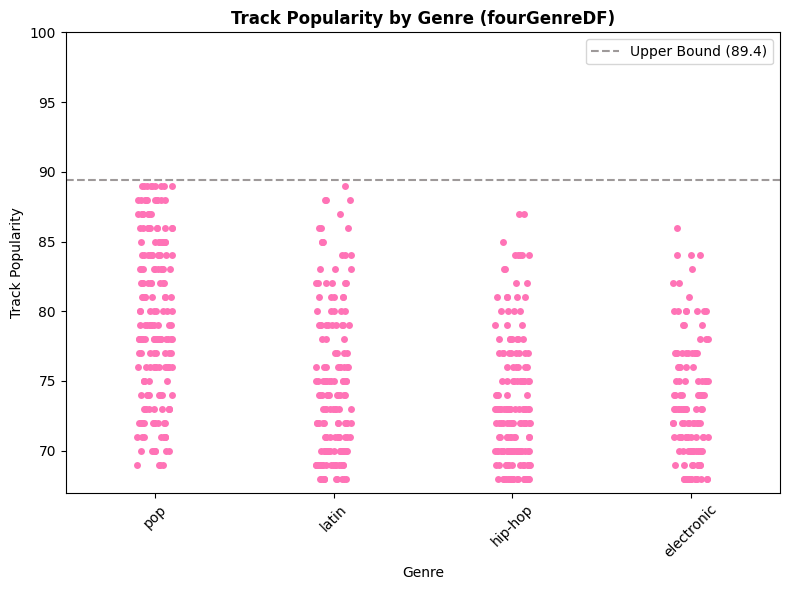

In [60]:
# Import the four genre spotify dataset
fourGenreDF = pd.read_csv('Datasets/04_four_genres_spotify_data(modifiedCopy).csv')

# Display a scatter plot to check 
plt.figure(figsize=(8, 6))
sns.stripplot(x='playlist_genre', y='track_popularity', data=fourGenreDF, jitter=True, size=5, color='#ff73b6')

# Add reference line at track_popularity = 89.4
plt.axhline(y=89.4, color='#9e9999', linestyle='--', label='Upper Bound (89.4)')

# Set titles and labels
plt.title('Track Popularity by Genre (fourGenreDF)', fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Track Popularity')
plt.ylim(fourGenreDF['track_popularity'].min() - 1, 100)
plt.xticks(rotation=45)
plt.legend()

# Adjust the layout
plt.tight_layout()
plt.savefig('Diagrams/02_strip_plot_genre_popularity.png', dpi=1000, bbox_inches='tight')
plt.show()

In [59]:
# Ensure track_album_release_date is treated as an integer (year only)
fourGenreDF['track_album_release_date'] = fourGenreDF['track_album_release_date'].astype(int)

# Define the audio features and popularity to aggregate
features = [
    'energy', 
    'tempo', 
    'danceability', 
    'loudness', 
    'liveness', 
    'valence', 
    'speechiness', 
    'instrumentalness', 
    'acousticness', 
    'track_popularity'
]

# Aggregate by genre and release year, computing median for each feature
aggregated_data = fourGenreDF.groupby(['playlist_genre', 'track_album_release_date'])[features].median().reset_index()

# Rename columns to indicate median
aggregated_data.columns = ['playlist_genre', 'track_album_release_date'] + [f'median_{col}' for col in features]

# Sort the results for better readability
aggregated_data = aggregated_data.sort_values(['playlist_genre', 'track_album_release_date'])

# Save the aggregated data to a new CSV file
aggregated_data.to_csv('Datasets/05_aggregated_spotify_data.csv', index=False)

# Display the first few rows of the aggregated data
display(aggregated_data)

,playlist_genre,track_album_release_date,median_energy,median_tempo,median_danceability,median_loudness,median_liveness,median_valence,median_speechiness,median_instrumentalness,median_acousticness,median_track_popularity
0,electronic,2008,0.8620,128.0360,0.4980,-6.0200,0.35200,0.4690,0.05880,9.180000e-03,0.000313,73.0
1,electronic,2010,0.7940,123.9715,0.6835,-5.1385,0.05720,0.7305,0.07505,0.000000e+00,0.063300,73.5
2,electronic,2011,0.7715,129.5135,0.7325,-4.3265,0.18650,0.5525,0.10230,2.430000e-04,0.065000,76.5
3,electronic,2012,0.8235,127.5375,0.6060,-3.5770,0.19450,0.3690,0.06370,0.000000e+00,0.083500,75.0
4,electronic,2013,0.8090,116.0470,0.7010,-6.8690,0.13100,0.4980,0.05580,6.530000e-06,0.039100,70.0
5,electronic,2014,0.7540,125.9830,0.5960,-5.4140,0.19300,0.4570,0.04330,1.410000e-05,0.129000,75.0
6,electronic,2015,0.8050,123.0630,0.5790,-4.1450,0.19800,0.4320,0.05270,0.000000e+00,0.059400,74.0
7,electronic,2016,0.7140,121.9990,0.6310,-5.3710,0.11100,0.4250,0.04090,3.170000e-05,0.109000,77.0
8,electronic,2017,0.6350,103.0190,0.6460,-5.0250,0.16400,0.5440,0.03400,0.000000e+00,0.049800,77.0
9,electronic,2018,0.7700,117.9730,0.7300,-5.3350,0.11200,0.4590,0.04760,7.970000e-06,0.176000,74.0
